<a href="https://colab.research.google.com/github/EtienneDouillard/Projet_M1/blob/main/Livrables/2_traitement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traitement des données

Penser à changer les répertoires pour accéder aux données 

## Bibliothèque utile

In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive
import csv
import tensorflow as tf



## Jeu de données fonctionnelles complètes


Jeu de données qui sera emputé afin d'obtenir des données partielles. 


### Traduction du code R en python 

#### Initialisation

In [ ]:
#taille matrice parfaite (U_true_mat)
nRegGrid = 50
#erreur utiliser pour tracer U_mat --> proche de 0 = proche de U_true_mat
eps_var = 0.025
#nombre de ligne pour U_mat --> plus il y a de lignes, plus la courbe sera précise
m = 50
#nombre d'échantillon
n=100000
#nombre d'échantillon test
o = int(0.1*n)
#permet d'initialiser k
n_basis = 50


#initialisé par rapport au code R
a=0
b=1

a_vec = np.full((1,n),np.nan)
b_vec = np.full((1,n),np.nan)


#vecteur parfait sans erreur
u_true_mat = np.array([x/nRegGrid for x in range(nRegGrid) for y in range(n)]).reshape(nRegGrid,n)

#vecteur qui contiendra des erreurs
u_mat = np.full((m,n),np.nan)

#matrice y_true
#y_true = (np.full((nRegGrid,n),np.nan))

#matrice y utilisée
y = (np.full((m,n),np.nan))

#vecteur 1 à n_basis
k_vec = np.array([x+1 for x in range(n_basis)])

#initialisation de x1 et x2
x1 = 50*np.sqrt(np.exp(-((k_vec-1)^2)/5)) * np.random.normal(size=50)
x2 = 50*np.sqrt(np.exp(-((k_vec)^2)/5)) * np.random.normal(size=50)

#### Initialiser U_mat

In [ ]:
#réutilisation du code R pour initialiser U_mat
i= 0    
while i<n:
  if (1==np.random.negative_binomial(1,0.75)):
      a_vec[0,i] = np.random.uniform(a, a+(b-a)*0.45)
      b_vec[0,i] = np.random.uniform(b-(b-a)*0.45, b)
  else:
      a_vec[0,i] = a
      b_vec[0,i] = b

  u_mat[:,i] = np.random.uniform(a_vec[0,i],b_vec[0,i],m)
  u_mat[:,i] = np.unique(u_mat[:,i])[np.argsort(u_mat[:,i])]

  minimal = np.argmin(u_mat[:,i])
  maximal = np.argmax(u_mat[:,i])

  u_mat[minimal,i] = a_vec[0,i]
  u_mat[maximal,i] = b_vec[0,i]
  u_mat[:,i].sort()
  i+=1

#### Initialiser y par rapport à U ,  Créer le vecteur aléatoire de courbe fonctionnelle

##### Définition utilisée dans le code R

In [ ]:
def mean_fun(u):
  return ((u-a)/(b-a)) + np.sin(2*np.pi*((u-a)/(b-a)))

def calY(x1,x2, u, i,k):
  return ( x1[k-1] * -1 * np.cos(k*np.pi * (u[:,i]-a)/(b-a))/np.sqrt(5) + x2[k-1] * np.sin(k*np.pi * (u[:,i]-a)/(b-a))/np.sqrt(5) )



Ces définitions permettrons de créer différentes courbes 

In [ ]:
def model3(u):
   for x in range(len(u)):
    u[x]=-(math.sqrt(u[x]))
   return (u)

def model4(u):
  for x in range(len(u)):
    u[x]=-(math.pow(4,u[x]))
  return (u)


def model5(u):
  for x in range(len(u)):
    u[x]= (u[x]**5) - (u[x]**3)

  return (u)

In [ ]:
def random_function(i,nombre_model): 
    functions = {
                  1 : k_vec_boucle.mean() + mean_fun(u_mat[:,i]),
                  2 : k_vec_boucle.mean() + mean_fun(u_mat[:,i]) + np.random.normal(size=m,loc=0,scale=np.sqrt(eps_var)),
                  3 : k_vec_boucle.mean() + model3(u_mat[:,i]),
                  4 : model5(u_mat[:,i]) + np.random.normal(size=m,loc=0,scale=np.sqrt(eps_var)),
    }
    k = random.randint(1,nombre_model)
    return  functions.get(k)


##### y par rapport à U

In [ ]:



i = 0
while (i<n):
  k_vec_boucle = np.array([calY(x1,x2,u_mat,i,k) for k in k_vec])
  #création des valeurs de y_true
  #y_true[:,i] = np.mean(x1[k_vec] * -1 * np.cos(k_vec*np.pi * (u_true_mat[:,i]-a)/(b-a))/np.sqrt(5) +  x2[k_vec] * np.sin(k_vec*np.pi * (u_true_mat[:,i]-a)/(b-a))/np.sqrt(5),0) + mean_fun(u_true_mat[:,i])
  
  

  #création des valeurs de y
  y[:,i]=random_function(i,4)

  i+=1

  

Affichage des courbes créées précédemments

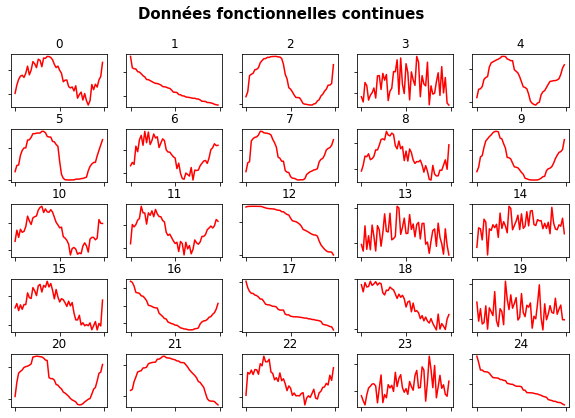

In [ ]:
## Test d'affichage 
#choisir le nombre de ligne et de colonne à afficher
row = 5
col = 5

#permet d'afficher
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))

fig.suptitle('Données fonctionnelles continues',fontweight ="bold",fontsize=15)


i = 0
while i<(row*col):
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],y[:,i], 'r')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

## Jeu de données fonctionnelles partielles 

Cette partie permet de choisir aléatoirement une position dans la courbe et d'enlever aléatoirement une longueur.
Deux listes seront créées, la première consistera à remplacer les valeurs par des NaN à l'index et de la longueur souhaitée. La seconde remplacera les valeurs manquantes par une droite d'équation y = ax + b

In [ ]:
i=0
#création d'une matrice de même taille que y
X_part = (np.full((m,n),np.nan))
X = (np.full((m,n),np.nan))

while i<n:

  #initialisation des variables par rapport à celle connue (y)
  X[:,i] = y[:,i]
  X_part[:,i] = y[:,i]

  #détermination de la taille de la partie partielle random entre 0 et 35 (pour le cas où m=50 --> max=50)
  partiePartielle = np.random.randint(1,35)

  #détermination du commencement de la partie partielle dans la courbe entre 0 et m
  idx = np.random.randint(1,m)

  #détermination des bornes xA et xB (partie gauche et partie droite de la partie partielle enlevée)
  xA = idx-1
  xB = idx+partiePartielle

  #Si xA est inférieur à 0 on défini la borne A par la moyenne de la courbe des données manquantes
  if (xA)<0:
    xA = 0
    yA = np.mean(X[xB:,i],0)
  else:
  #Autrement xA existe et on prend sa valeur
    yA = X[xA,i]

  #Si xB est supérieur à la taille maximal de la matrice on défini la borne b par la moyenne de la courbe des données manquantes
  if (xB)>=m:
    xB=m
    yB = np.mean(X[0:xA,i],0)
  else:
  #Autrement xB existe et on prend sa valeur
    yB = X[xB,i]

  #Calcul du coefficient directeur de la droite 
  coef = (yB-yA)/(xB-xA)
  #Créer un vecteur de la taille de la partie partielle avec l'équation de la droite --> droite = ax + b avec x=[1,...,partiePartielle]
  tab = [ (yA + x * coef) for x in range(1,partiePartielle+1,1) ]

  #Remplacer les valeurs soit par des NaN ou le vecteur précédent
  j = idx
  k = 0
  while j<idx+partiePartielle and j<nRegGrid:
    X_part[j,i] = np.nan  #imputation
    X[j,i] = tab[k]       #reconstruction
    j+=1
    k+=1
  i+=1


Cette partie permet de créer un des courrbes fonctionnielles partielles continues, mais contrairement à précédemment, la taille et la position est fixe

In [ ]:
i=0
#création d'une matrice de même taille que y
X_part_fixe = (np.full((m,n),np.nan))
X_fixe = (np.full((m,n),np.nan))

#détermination de la taille de la partie partielle random entre 0 et 35 (pour le cas où m=50 --> max=50)
partiePartielle = 5
#détermination du commencement de la partie partielle dans la courbe entre 0 et m
idx = 45


y_predireFixe = (np.full((partiePartielle,n),np.nan))

while i<n:

  #initialisation des variables par rapport à celle connue (y)
  X_fixe[:,i] = y[:,i]
  X_part_fixe[:,i] = y[:,i]

  #détermination des bornes xA et xB (partie gauche et partie droite de la partie partielle enlevée)
  xA = idx-1
  xB = idx+partiePartielle

  #Si xA est inférieur à 0 on défini la borne A par la moyenne de la courbe des données manquantes
  if (xA)<0:
    xA = 0
    yA = np.mean(X_fixe[xB:,i],0)
  else:
  #Autrement xA existe et on prend sa valeur
    yA = X_fixe[xA,i]

  #Si xB est supérieur à la taille maximal de la matrice on défini la borne b par la moyenne de la courbe des données manquantes
  if (xB)>=m:
    xB=m
    yB = np.mean(X_fixe[0:xA,i],0)
  else:
  #Autrement xB existe et on prend sa valeur
    yB = X_fixe[xB,i]

  #Calcul du coefficient directeur de la droite 
  coef = (yB-yA)/(xB-xA)
  #Créer un vecteur de la taille de la partie partielle avec l'équation de la droite --> droite = ax + b avec x=[1,...,partiePartielle]
  tab = [ (yA + x * coef) for x in range(1,partiePartielle+1,1) ]

  #Remplacer les valeurs soit par des NaN ou le vecteur précédent
  j = idx
  k = 0
  while j<idx+partiePartielle and j<nRegGrid:
    X_part_fixe[j,i] = np.nan  #imputation
    X_fixe[j,i] = tab[k]       #reconstruction
    y_predireFixe[k,i] = y[j,i]
    j+=1
    k+=1
  i+=1

print(y_predireFixe[:,0])

[0.42225837 0.30530865 0.60256547 0.74774874 1.33501739]


## Visualisation des données 

### Données fonctionnelles continues (Etape 1 CDC)

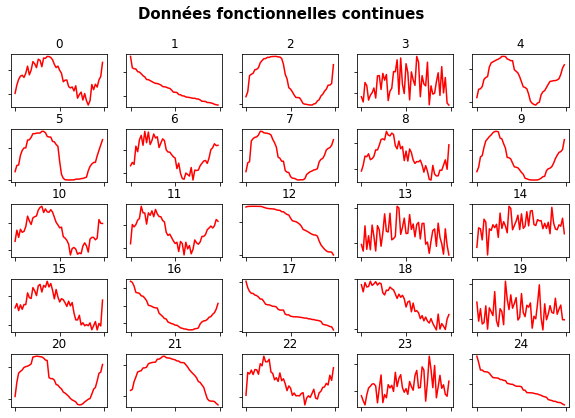

In [ ]:
#choisir le nombre de ligne et de colonne à afficher
row = 5
col = 5

#permet d'afficher
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))

fig.suptitle('Données fonctionnelles continues',fontweight ="bold",fontsize=15)


i = 0
while i<(row*col):
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],y[:,i], 'r')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)

  i+=1



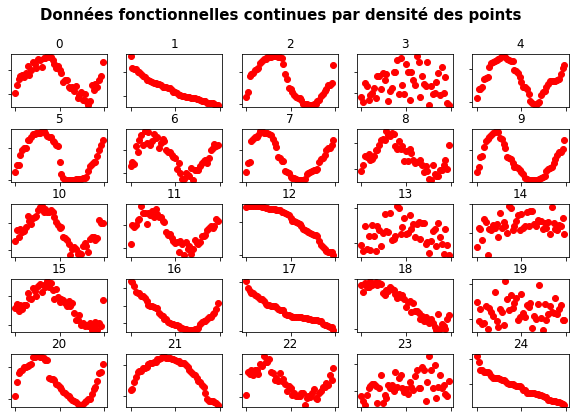

In [ ]:
#permet d'afficher
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig.suptitle('Données fonctionnelles continues par densité des points',fontweight ="bold",fontsize=15)


i = 0
while i<(row*col):
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],y[:,i], 'ro')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)

  i+=1

### Données fonctionnelles partielles discontinues (Etape 2 CDC)





= Données fonctionnelles imputées

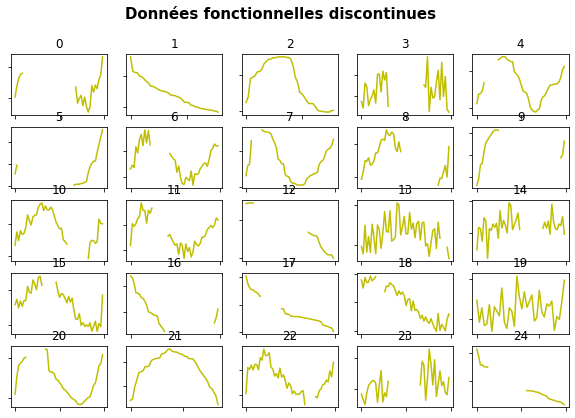

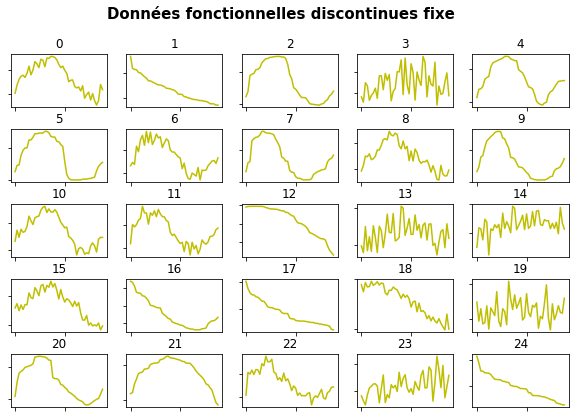

In [ ]:
#choisir le nombre de ligne et de colonne à afficher
row = 5
col = 5

#permet d'afficher
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig.suptitle('Données fonctionnelles discontinues',fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig2.suptitle('Données fonctionnelles discontinues fixe',fontweight ="bold",fontsize=15)

i = 0
while i<(row*col):
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],X_part[:,i],'y')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  ax2[i1,i2].plot(u_true_mat[:,i],X_part_fixe[:,i],'y')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1


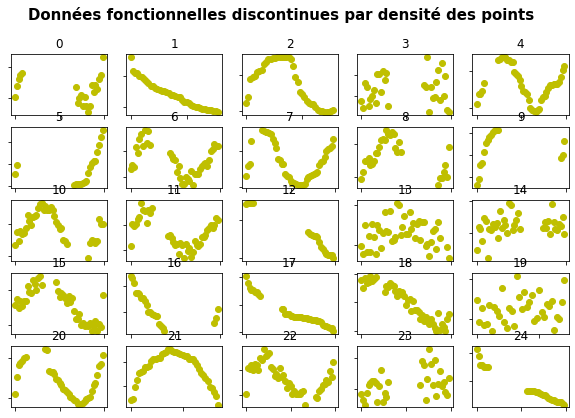

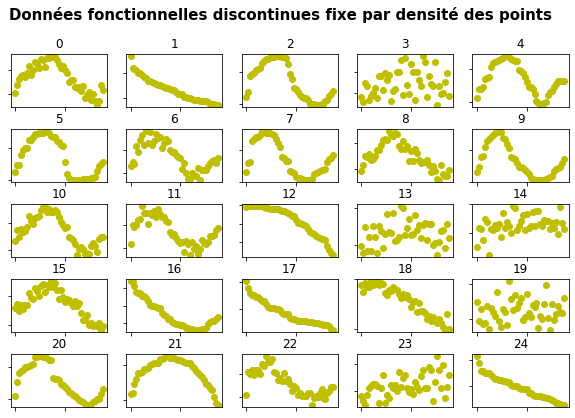

In [ ]:
 
#permet d'afficher
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig.suptitle('Données fonctionnelles discontinues par densité des points',fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig2.suptitle('Données fonctionnelles discontinues fixe par densité des points',fontweight ="bold",fontsize=15)

i = 0
while i<(row*col):
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],X_part[:,i],'yo')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  ax2[i1,i2].plot(u_true_mat[:,i],X_part_fixe[:,i],'yo')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

### Données fonctionnelles partielles continues (Etape 3 CDC)

= Données emputées puis "lissées" pour êtres continues

In [ ]:
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig.suptitle("Données fonctionnelles partielles = Données entrée réseau",fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*1.3))
fig2.suptitle("Données fonctionnelles partielles fixe = Données entrée réseau",fontweight ="bold",fontsize=15)



i = 0
while i<row*col:
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],X[:,i],'b')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  ax2[i1,i2].plot(u_true_mat[:,i],X_fixe[:,i],'b')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

In [ ]:
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig.suptitle("Données fonctionnelles partielles par densité de points = Données entrée réseau",fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig2.suptitle("Données fonctionnelles partielles fixe par densité de points = Données entrée réseau",fontweight ="bold",fontsize=15)

i = 0
while i<row*col:
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],X[:,i],'bo')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  ax2[i1,i2].plot(u_true_mat[:,i],X_fixe[:,i],'bo')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

### Comparaison (visualisation) des données (Etape 4 CDC)

##### Visualisation des données partièlles discontinue (jaune) et continue  (bleu)

L'algoritme recevra la courbe bleue.

In [ ]:
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig.suptitle('Données partièlles discontinues (jaune) \n & données partielles continues (bleu)',fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig2.suptitle('Données partièlles discontinues (jaune) \n & données partielles continues (bleu)',fontweight ="bold",fontsize=15)

i = 0
while i<row*col:
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],X[:,i],'-')
  ax[i1,i2].plot(u_true_mat[:,i],X_part[:,i], 'y')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  ax2[i1,i2].plot(u_true_mat[:,i],X_fixe[:,i],'-')
  ax2[i1,i2].plot(u_true_mat[:,i],X_part_fixe[:,i], 'y')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

##### Visualisation des données partièlles discontinue (jaune) et continue  (bleu) et données fonctionnelles (rouge)

In [ ]:
fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig.suptitle('Données partièlles discontinues (jaune) & données partielles continues (bleu) \n & données fonctionnelles (rouge)',fontweight ="bold",fontsize=15)

fig2, ax2 = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))
fig2.suptitle('Données partièlles discontinues (jaune) & données partielles continues (bleu) \n & données fonctionnelles (rouge)',fontweight ="bold",fontsize=15)


i = 0
while i<row*col:
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],y[:,i], 'r')
  ax[i1,i2].plot(u_true_mat[:,i],X[:,i],'-')
  ax[i1,i2].plot(u_true_mat[:,i],X_part[:,i], 'y')
  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])

  ax2[i1,i2].plot(u_true_mat[:,i],y[:,i], 'r')
  ax2[i1,i2].plot(u_true_mat[:,i],X_fixe[:,i],'-')
  ax2[i1,i2].plot(u_true_mat[:,i],X_part_fixe[:,i], 'y')
  ax2[i1,i2].set(title=i)
  ax2[i1,i2].set_xticklabels([])
  ax2[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

# Séparation des donnnées

## Bibliothèques utiles

In [ ]:
#Fonction qui permet de séparer en un pourcentage les données mises en entrée aléatoirement
from sklearn.model_selection import train_test_split

## Constantes utiles

In [ ]:
#Pourcentage du nombre d'échantillon train voulu 
nbTrainVoulu = 0.8
#Taille d'échantillon de Train
lengthTrain = int(nbTrainVoulu * n)
#Pourcentage du nombre d'échantillon test voulu
nbTestVoulu = 0.5
#Taille d'échantillon de test
lengthTest = int(nbTestVoulu * (n-lengthTrain))
#Taille d'échantillon de validation
lengthValid = n-lengthTrain-lengthTest

#Vérification
print(lengthTrain,lengthTest,lengthValid)

## 80% de X : Entrainement

In [ ]:
#Séparation en 0.8 de X et y
#Utilisation de reshape pour changer l'ordre du nombre d'échantillon de données (n) par le nombre de données (m)
x_train = X[:,0:lengthTrain]
y_train = y[:,0:lengthTrain]

x_trainFixe = X_fixe[:,0:lengthTrain]
y_trainFixe = y_predireFixe[:,0:lengthTrain]
#vérification de la taille
print(x_train.shape)

## 10% Test, 10% Validation

In [ ]:
#Utilisation des 20% pourcent restant de la donnée précédente dans x_prime et y_prime
#Séparation en 0.5 pour récupérer les 10% de chacun
x_test = X[:,lengthTrain:(lengthTrain+lengthTest)]
x_testPart = X_part[:,lengthTrain:(lengthTrain+lengthTest)]
x_valid = X[:,(lengthTrain+lengthTest):]
y_test = y[:,lengthTrain:(lengthTrain+lengthTest)]
y_valid =  y[:,(lengthTrain+lengthTest):]

x_testFixe = X_fixe[:,lengthTrain:(lengthTrain+lengthTest)]
x_testFixePart = X_part_fixe[:,lengthTrain:(lengthTrain+lengthTest)]
x_validFixe = X_fixe[:,(lengthTrain+lengthTest):]
y_testFixe = y_predireFixe[:,lengthTrain:(lengthTrain+lengthTest)]
y_validFixe =  y_predireFixe[:,(lengthTrain+lengthTest):]

#vérification de la taille
print(x_test.shape,x_valid.shape)

## Mettre les données en format voulu (nombre de données, nombre d'échantillon)

In [ ]:






fig.suptitle('Données y_train (jaune) & données x_train (bleu)',fontweight ="bold",fontsize=15)


row = 3 
col = 3 

fig, ax = plt.subplots(nrows=row,ncols=col,figsize=(row*2,col*2))


i = 0
while i<row*col:
  i1 = int(i/col)
  i2 = i%col
  ax[i1,i2].plot(u_true_mat[:,i],x_train[:,i],'-')
  ax[i1,i2].plot(u_true_mat[:,i],y_train[:,i],'-')

  ax[i1,i2].set(title=i)
  ax[i1,i2].set_xticklabels([])
  ax[i1,i2].set_yticklabels([])
  plt.gcf().subplots_adjust(hspace=0.4)
  i+=1

Ci-dessous, on importe le dossier drive pour permettre de télécharger ou exporter des fichiers qui pour la suite nous sera utile. Ces données seront importées et utilisées pour l'entrainement et les tests sur les réseaux de neuronnes créés. 

In [ ]:

drive.mount('/content/drive')


In [ ]:

x_train=x_train.transpose() # x.shape = (nbEchantillons, nbPoints)
y_train=y_train.transpose()
x_test=x_test.transpose() # x.shape = (nbEchantillons, nbPoints)
y_test=y_test.transpose()
y_valid=y_valid.transpose()
x_valid=x_valid.transpose() # x.shape = (nbEchantillons, nbPoints)
x_testPart = x_testPart.transpose()


x_trainFixe=x_trainFixe.transpose() # x.shape = (nbEchantillons, nbPoints)
y_trainFixe=y_trainFixe.transpose()
x_testFixe=x_testFixe.transpose() # x.shape = (nbEchantillons, nbPoints)
y_testFixe=y_testFixe.transpose()
y_validFixe=y_validFixe.transpose()
x_validFixe=x_validFixe.transpose() # x.shape = (nbEchantillons, nbPoints)
x_testFixePart = x_testFixePart.transpose()


print(x_train.shape,x_trainFixe.shape)


x_base = x_test.reshape(lengthTest*m)
x_testPart = x_testPart.reshape(lengthTest*m)
base = pd.DataFrame({'x_base':x_base,'x_part':x_testPart}) 
base.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/baseTest.csv') #export la courbe donnéees partielles continues (courbe bleu)
x_train = tf.keras.utils.normalize(x_train).reshape(lengthTrain*m) #normalisation des x pour accélérer les calculs lors de la création du réseau de neurones + reshape des données pour avoir une liste à une dimension
y_train = y_train.reshape(lengthTrain*m)
x_test = tf.keras.utils.normalize(x_test).reshape(lengthTest*m)
y_test = y_test.reshape(lengthTest*m)
x_valid = tf.keras.utils.normalize(x_valid).reshape(lengthValid*m)
y_valid = y_valid.reshape(lengthValid*m)
train=pd.DataFrame({'x_train':x_train,'y_train':y_train})
test =pd.DataFrame({ 'x_test':x_test,'y_test':y_test})
valid=pd.DataFrame({ 'x_valid':x_valid,'y_valid':y_valid})
train.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/train.csv') #exportation des fichiers en format csv
test.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/test.csv')
valid.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/valid.csv')



x_baseFixe = x_testFixe.reshape(lengthTest*m)
x_testFixePart = x_testFixePart.reshape(lengthTest*m)
baseFixe = pd.DataFrame({'x_base':x_baseFixe,'x_part':x_testFixePart}) 
baseFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/baseTestFixe2_indice45.csv') #export la courbe donnéees partielles continues (courbe bleu)
x_trainFixe = tf.keras.utils.normalize(x_trainFixe).reshape(lengthTrain*m) #normalisation des x pour accélérer les calculs lors de la création du réseau de neurones + reshape des données pour avoir une liste à une dimension
y_trainFixe = y_trainFixe.reshape(lengthTrain*partiePartielle)
x_testFixe = tf.keras.utils.normalize(x_testFixe).reshape(lengthTest*m)
y_testFixe = y_testFixe.reshape(lengthTest*partiePartielle)
x_validFixe = tf.keras.utils.normalize(x_validFixe).reshape(lengthValid*m)
y_validFixe = y_validFixe.reshape(lengthValid*partiePartielle)
xtrainFixe=pd.DataFrame({'x_train':x_trainFixe})
xtestFixe =pd.DataFrame({'x_test':x_testFixe})
xvalidFixe=pd.DataFrame({'x_valid':x_validFixe})
ytrainFixe=pd.DataFrame({'y_train':y_trainFixe})
ytestFixe =pd.DataFrame({'y_test':y_testFixe})
yvalidFixe=pd.DataFrame({'y_valid':y_validFixe})
xtrainFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/trainFixe2_indice45x.csv') #exportation des fichiers en format csv
xtestFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/testFixe2_indice45x.csv')
xvalidFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/validFixe2_indice45x.csv')

ytrainFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/trainFixe2_indice45y.csv') #exportation des fichiers en format csv
ytestFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/testFixe2_indice45y.csv')
yvalidFixe.to_csv('/content/drive/MyDrive/Projet-M1-Deep-FDA/Codes/Python/1-Simulation_data/Data/validFixe2_indice45y.csv')